# Adult Dataset – Data Preprocessing & Feature Pipeline  
### Machine Learning Mini Project

This project demonstrates data preprocessing, feature engineering,
feature selection, and visualization using the Adult Income dataset.


## Environment Setup

In [1]:
import sys
import os

# Add src folder to Python path
sys.path.append(os.path.abspath("src"))
print("src folder added")

src folder added


## Import Required Modules

In [2]:
import pandas as pd

from src.load_data import load_dataset
from src.preprocess import preprocess_data
from src.feature_engineering import engineer_features
from src.feature_selection import feature_selection_pipeline
from src.visualization import visualization_pipeline

## Load Dataset

In [3]:
df = load_dataset()
df.head()

[INFO] Loading dataset from: data/raw/adult_with_headers.csv
[INFO] Dataset loaded successfully. Shape: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing

In [4]:
df_preprocessed = preprocess_data(df)
df_preprocessed.head()

[INFO] Handling missing values...
[INFO] Encoding categorical features...
[INFO] Scaling numerical features...


d:\Projectes\Data-Science\Assignments\EDA2\src\preprocess.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
d:\Projectes\Data-Science\Assignments\EDA2\src\preprocess.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

[INFO] Cleaned dataset saved to: data/processed/cleaned_data.csv


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,0.02174,0.0,0.397959,0.951220,<=50K,False,True
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,0.00000,0.0,0.122449,0.951220,<=50K,False,True
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,0.00000,0.0,0.397959,0.951220,<=50K,False,True
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,0.00000,0.0,0.397959,0.951220,<=50K,False,True
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.00000,0.0,0.397959,0.121951,<=50K,True,False


## Feature Engineering

In [5]:
df_engineered = engineer_features(df_preprocessed)
df_engineered.head()

[INFO] Creating new features...
[INFO] Applying log transformation...


c:\Users\pndin\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


[INFO] Engineered dataset saved to: data/processed/engineered_data.csv


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,age_group,capital_net
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,0.021507,0.0,0.397959,0.951220,<=50K,False,True,Young,0.021507
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,0.000000,0.0,0.122449,0.951220,<=50K,False,True,Young,0.000000
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,0.000000,0.0,0.397959,0.951220,<=50K,False,True,Young,0.000000
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,0.000000,0.0,0.397959,0.951220,<=50K,False,True,Young,0.000000
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.000000,0.0,0.397959,0.121951,<=50K,True,False,Young,0.000000


## Feature Selection

In [6]:
df_selected, mi_df = feature_selection_pipeline(df_engineered)
mi_df.head()

[INFO] Running Isolation Forest...
[INFO] Removing outliers...
[INFO] Outlier-free dataset shape: (31909, 18)
[INFO] Outlier-free dataset saved to: output/outliers_removed.csv
[INFO] Computing Mutual Information scores...
[INFO] Mutual Information scores saved to: output/mutual_information.csv


,feature,mutual_information
7,relationship,0.117936
5,marital_status,0.114197
16,capital_net,0.107675
9,capital_gain,0.078305
0,age,0.070094


## Visualizations

In [7]:
visualization_pipeline(df_selected)

[INFO] Starting visualization pipeline...
[INFO] Creating correlation matrix heatmap...
[INFO] Correlation matrix saved to: output/correlation_matrix.png
[INFO] Computing Mutual Information matrix...
[INFO] MI heatmap saved to: output/mutual_information_heatmap.png
[INFO] Visualization pipeline completed.


### Output Plots

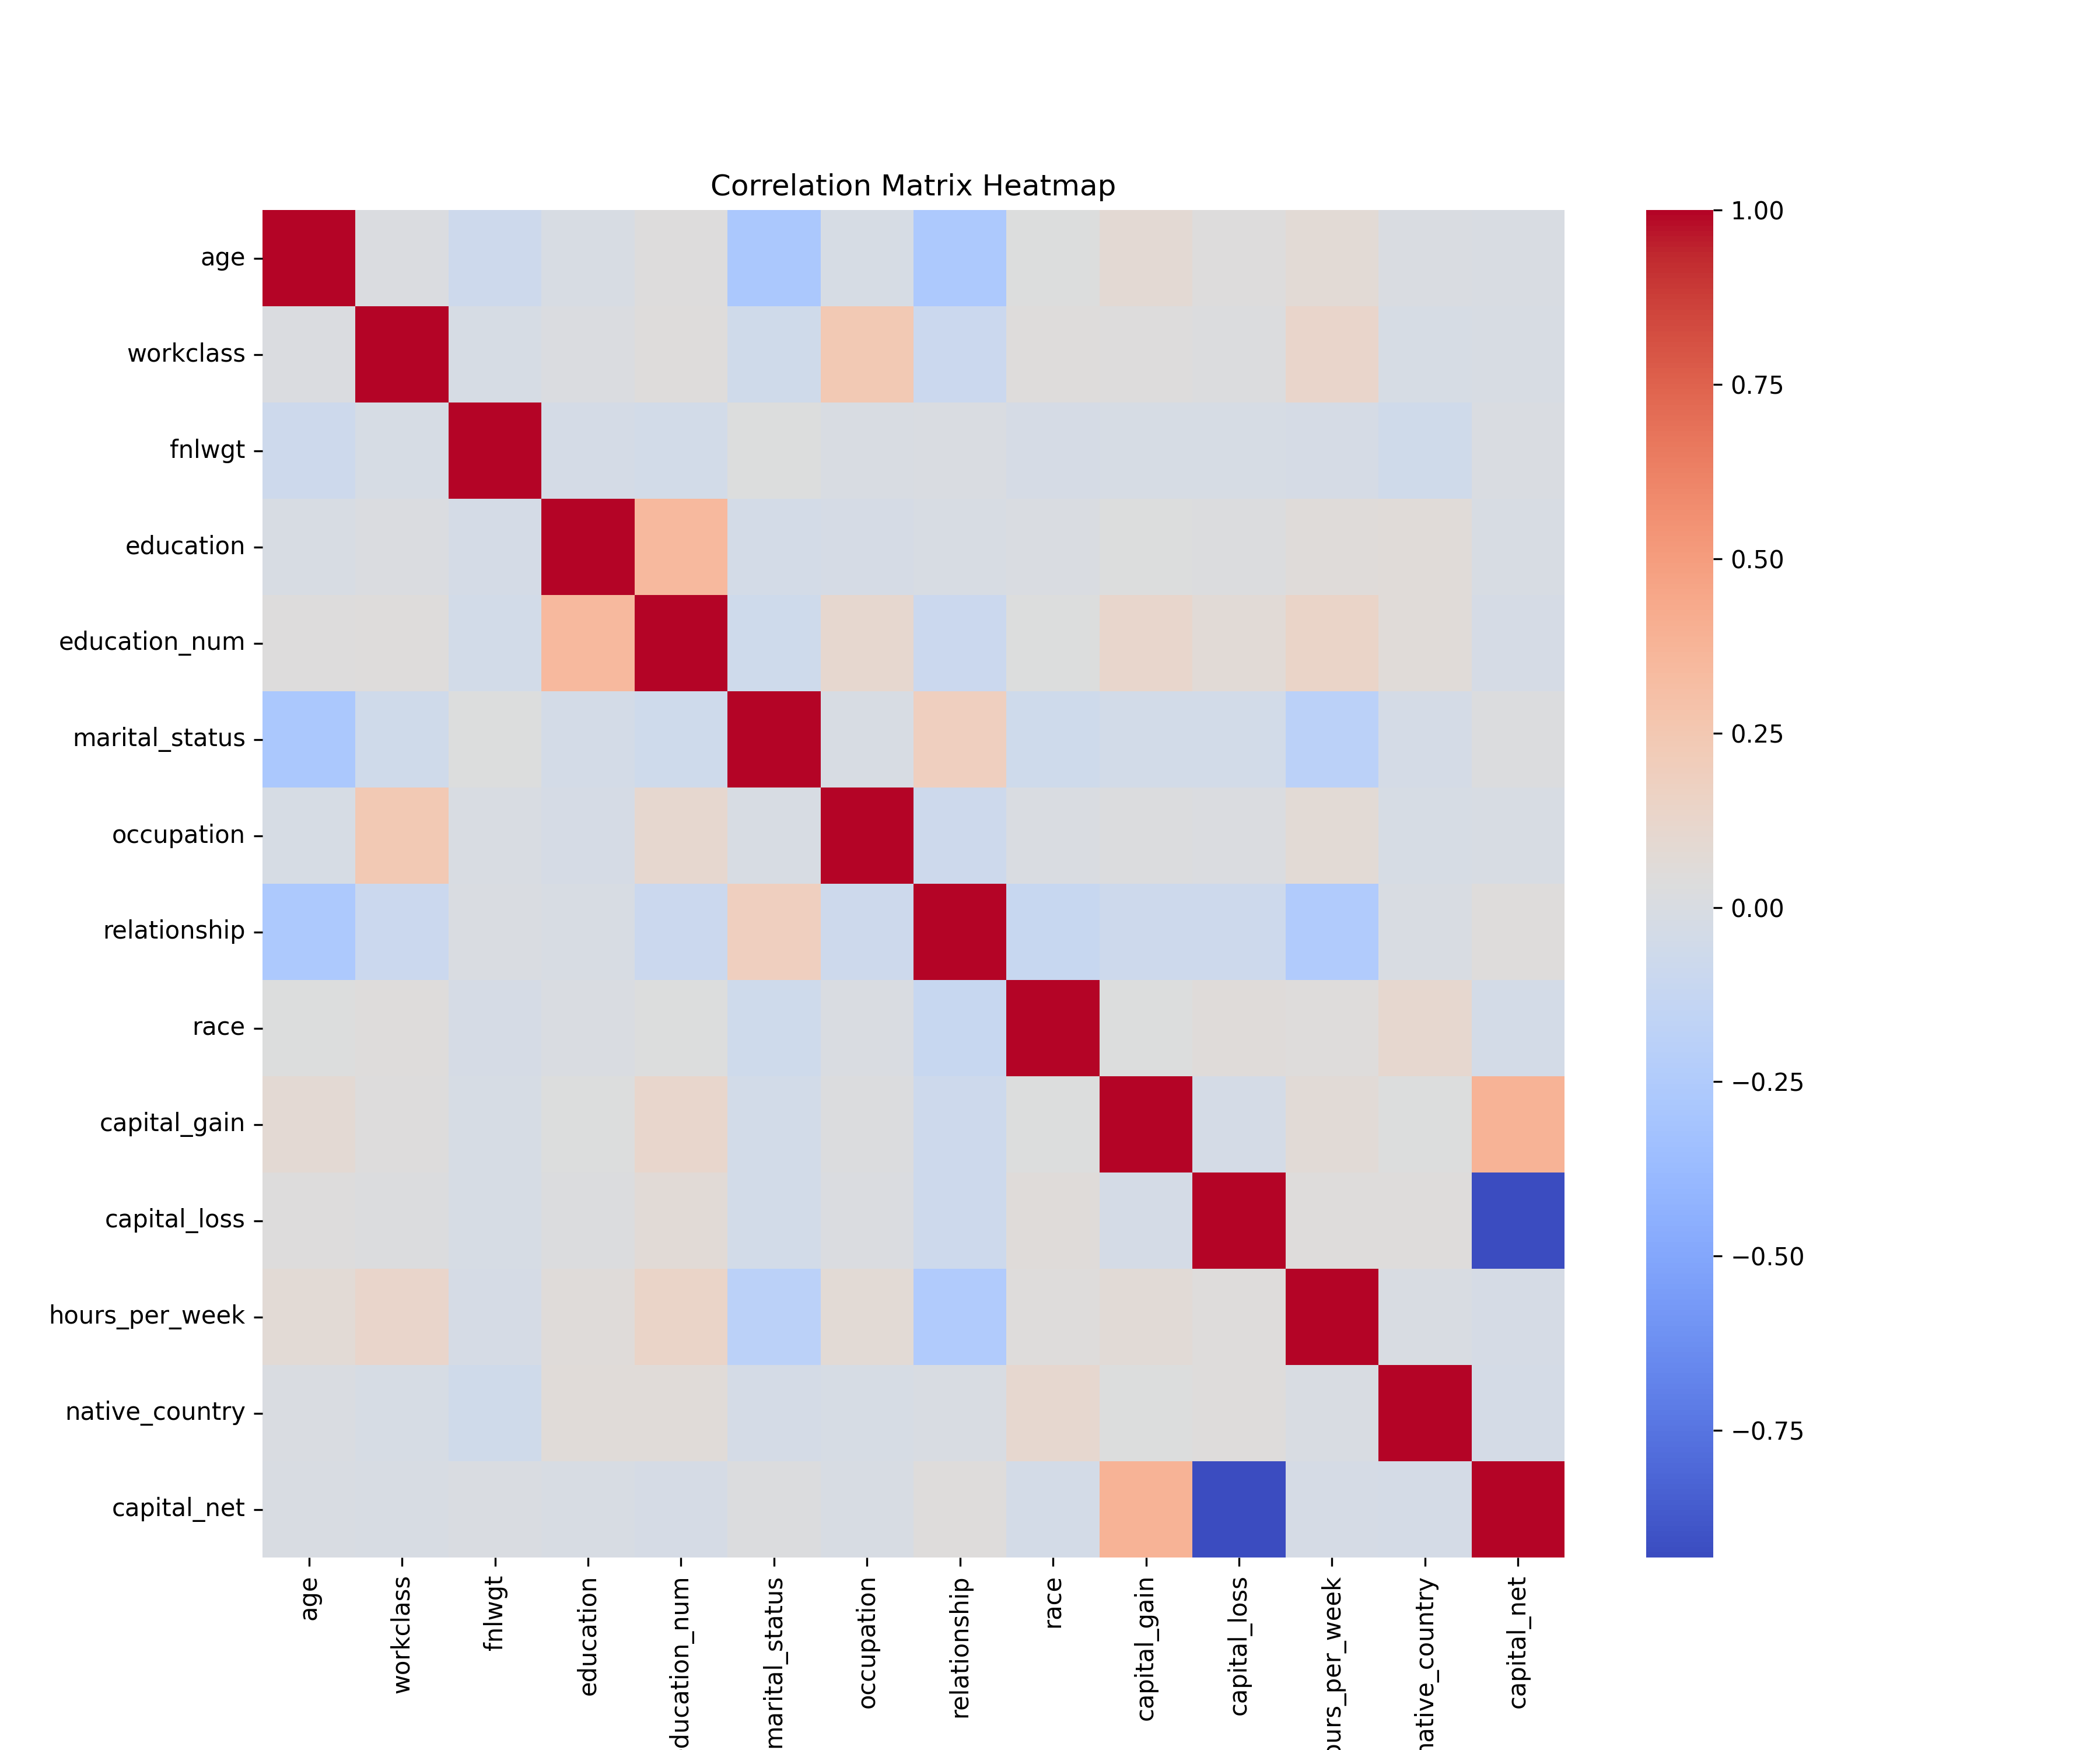

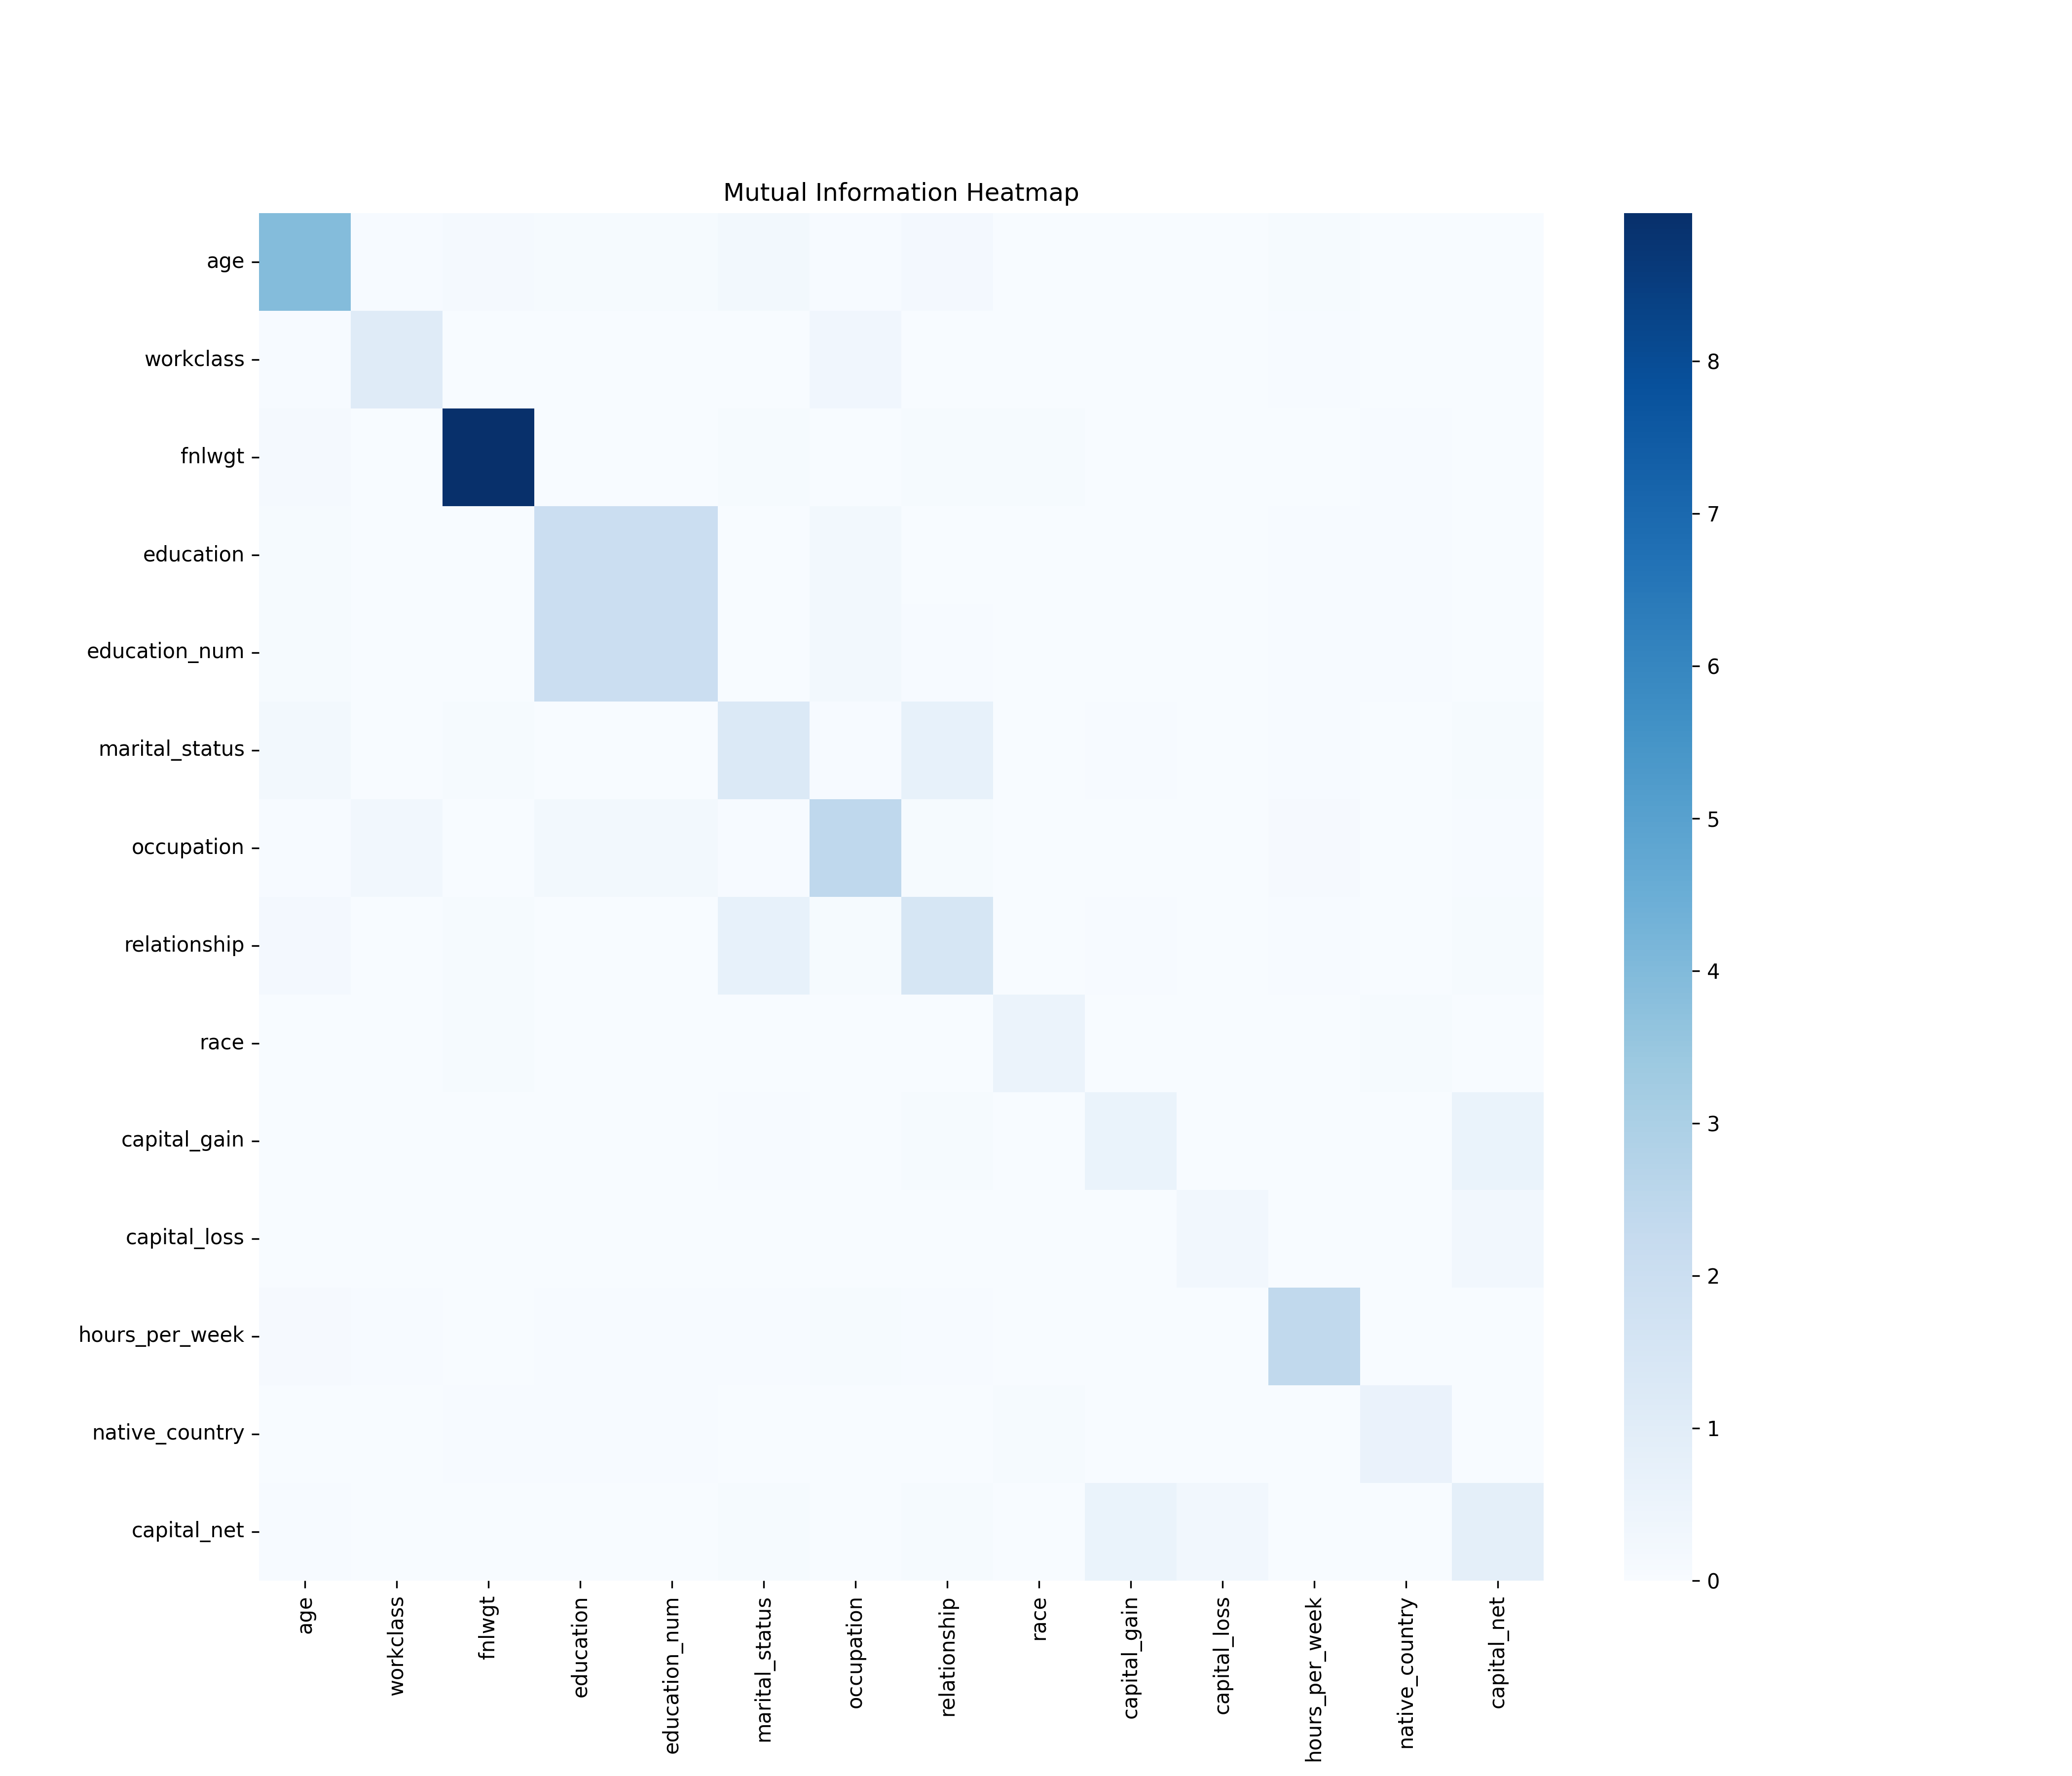

In [8]:
from IPython.display import Image, display
import os

for f in os.listdir("output"):
    if f.endswith(".png"):
        display(Image(filename=os.path.join("output", f)))

## Conclusion

The preprocessing and feature analysis pipeline was successfully completed.
